# 8.6 시계열 데이터의 딥러닝 실습
0. 데이터 준비
1. 구글 드라이브 연동
2. 데이터 업로드
3. 데이터 읽기
4. 데이터 확인
5. 딥러닝을 위한 데이터 형태 등 변환
6. 딥러닝 모델 디자인

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
data_no = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/ecg/ptbdb_normal.csv')
data_ab = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/ecg/ptbdb_abnormal.csv')

data_no = np.array(data_no)
data_ab = np.array(data_ab)

In [ ]:
data_no.shape

(4045, 188)

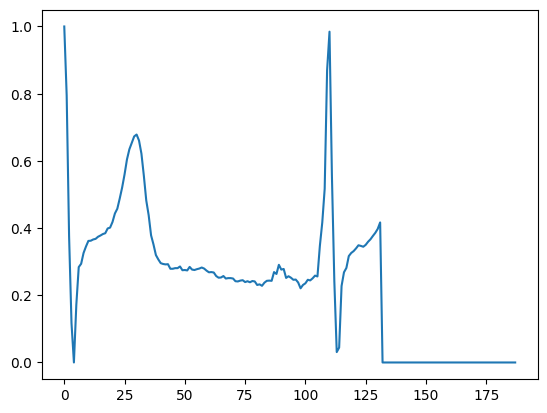

In [ ]:
plt.plot(data_no[0,:])

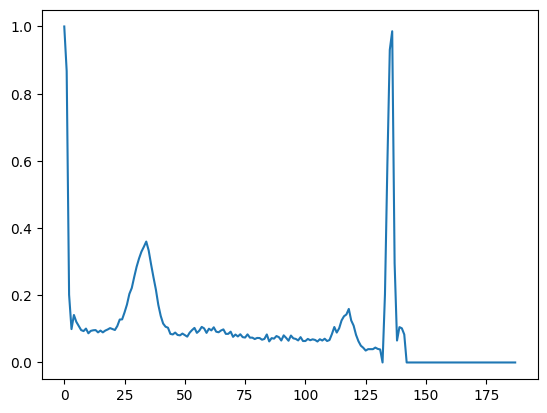

In [ ]:
plt.plot(data_no[3,:])

In [ ]:
# np.concatenate
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])
print(np.concatenate((a, b), axis=0))
print(np.concatenate((a, b.T), axis=1))
print(np.concatenate((a, b), axis=None))

[[1 2]
 [3 4]
 [5 6]]
[[1 2 5]
 [3 4 6]]
[1 2 3 4 5 6]


In [ ]:
# 데이터를 train, test 데이터로 나누기
nTrain = 3000 # 학습 데이터
nTest = 1000  # 테스트 데이터

# 학습/테스트 데이터 생성을 위해 정상/비정상 데이터 통합 - concatenate
# 학습 데이터의 출력 데이터 구성 시,
# 학습 데이터 개수만큼의 1, np.ones()
# 테스트 개수만큼의 0으로 구성 np.zeros()
x_train = np.concatenate((data_no[:nTrain,:], data_ab[:nTrain,:]),0)
y_train = np.concatenate((np.zeros(nTrain,), np.ones(nTrain,)),0)
x_test = np.concatenate((data_no[nTrain:nTrain+nTest,:],  # 3000~4000 사이
                         data_ab[nTrain:nTrain+nTest,:]),0)
y_test = np.concatenate((np.zeros(nTest,), np.ones(nTest,)),0)

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers

# 출력 데이터 - 원-핫-인코딩 적용
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)
# 입력 데이터 - CNN 위해 차원(=축,axis) 추가
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)

In [ ]:
# 합성곱 층 2개당 maxpooling 2개
# 마지막 완전연결층 출력은 2개
model = Sequential()
model.add(layers.Conv1D(filters=16, kernel_size=3,
                        input_shape=(x_train.shape[1],1), activation='relu'))
model.add(layers.Conv1D(filters=16, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=3, strides=2))
model.add(layers.Conv1D(filters=32, kernel_size=3,
                        input_shape=(x_train.shape[1],1), activation='relu'))
model.add(layers.Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=3, strides=2))
model.add(layers.LSTM(16))
model.add(layers.Dense(units=2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=
              optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=50, batch_size=128, validation_split=0.2)

Epoch 1/50
38/38 [==============================] - 14s 32ms/step - loss: 0.6282 - accuracy: 0.6535 - val_loss: 0.6688 - val_accuracy: 0.5875
Epoch 2/50
38/38 [==============================] - 0s 8ms/step - loss: 0.5880 - accuracy: 0.7031 - val_loss: 0.9005 - val_accuracy: 0.4800
Epoch 3/50
38/38 [==============================] - 0s 8ms/step - loss: 0.5728 - accuracy: 0.7163 - val_loss: 0.8126 - val_accuracy: 0.4867
Epoch 4/50
38/38 [==============================] - 0s 8ms/step - loss: 0.5661 - accuracy: 0.7208 - val_loss: 0.8938 - val_accuracy: 0.4575
Epoch 5/50
38/38 [==============================] - 0s 8ms/step - loss: 0.5615 - accuracy: 0.7219 - val_loss: 0.9048 - val_accuracy: 0.4367
Epoch 6/50
38/38 [==============================] - 0s 8ms/step - loss: 0.5480 - accuracy: 0.7379 - val_loss: 0.8870 - val_accuracy: 0.4108
Epoch 7/50
38/38 [==============================] - 0s 9ms/step - loss: 0.5327 - accuracy: 0.7362 - val_loss: 0.7307 - val_accuracy: 0.5067
Epoch 8/50
38/38 [

In [ ]:
o = model.predict(x_test)       # 예측  -> 한꺼번에 테스트
o = np.argmax(o,1)              # 10진수로 변환
y_test = np.argmax(y_test,1)    # 정답 데이터도 10진수 변환
sum(np.equal(y_test,o))/len(y_test) # 정확도 출력

63/63 [==============================] - 1s 4ms/step


0.918